In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [3]:
X_train.shape, X_test.shape

((105, 804), (45, 804))

In [4]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [5]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)  # Провели бинаризацию каждого класса целевой переменной
y_onehot_test.shape  # (n_samples, n_classes)

(45, 3)

In [6]:
label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [7]:
# ROC кривая для одного класса Iris virginica:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

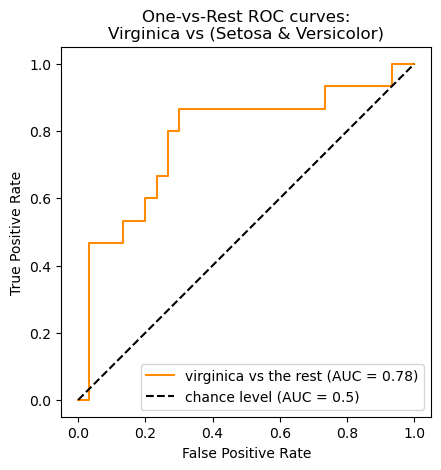

In [8]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_onehot_test[:, class_id], y_score[:, class_id],
                                 name=f"{class_of_interest} vs the rest", color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [9]:
class_of_interest = "setosa"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

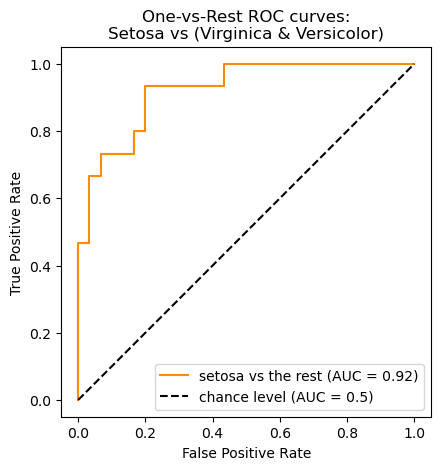

In [10]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_onehot_test[:, class_id], y_score[:, class_id],
                                 name=f"{class_of_interest} vs the rest", color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nSetosa vs (Virginica & Versicolor)")
plt.legend()
plt.show()

In [11]:
class_of_interest = "versicolor"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

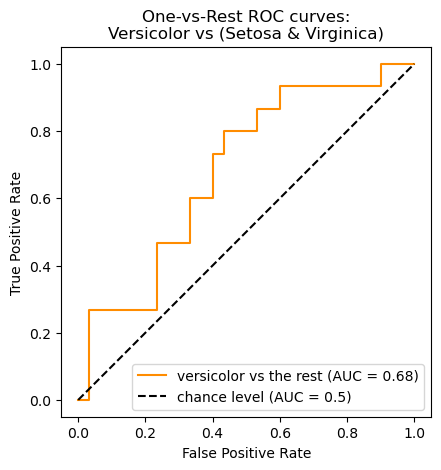

In [12]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_onehot_test[:, class_id], y_score[:, class_id],
                                 name=f"{class_of_interest} vs the rest", color="darkorange",)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVersicolor vs (Setosa & Virginica)")
plt.legend()
plt.show()

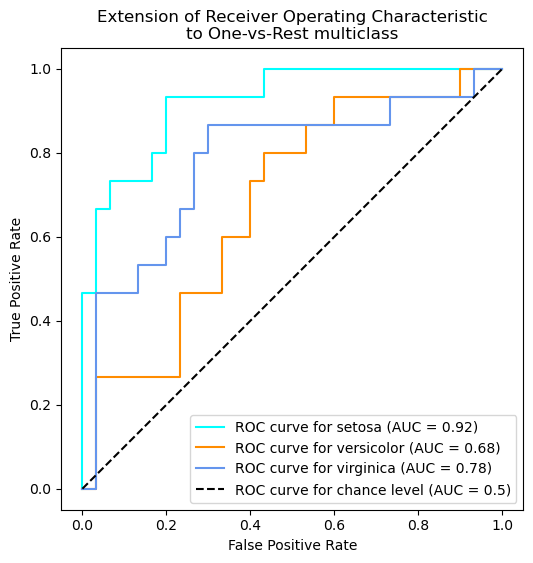

In [13]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()
